In [34]:
from numpy.linalg import inv
import numpy as np
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:


class BayesianLinearRegression:
    def __init__(self, n_features, alpha, beta):
        self.n_features = n_features
        self.alpha = alpha
        self.beta = beta
        self.mean = np.zeros(n_features)
        self.cov = np.identity(n_features) * alpha
    
    def learn(self, x, y):
        # Update the inverse covariance matrix (
        # Equation 77# Update the mean vector
        cov = inv(inv(self.cov) + self.beta * x @ np.transpose(x))
        self.cov = cov
        self.mean = self.cov @ (inv(cov) @ self.mean +  self.beta * y  @ x)
        
        # Equation 78
        return self
        
    def predict(self, x):
        # Obtain the predictive mean
        # Equation 62, Equation 80
        # Obtain the predictive variance
        # Equation 81
        y_pred_mean = self.weights_dist().T @ x
        y_pred_var = 1/ self.beta + x.T @ self.cov @ x
                             
        return stats.norm(loc=y_pred_mean, scale=y_pred_var ** .5)
    
    @property
    def weights_dist(self):
        return stats.multivariate_normal(mean=self.mean, cov=self.cov)
    
X, y = load_boston(return_X_y=True)
n_features  = len(load_boston()['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
blr = BayesianLinearRegression(n_features ,0.3, 1.0)
blr.learn(X_train,y_train)
blr.predict(X_test[0],y_test[0])

/home/x/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

ValueError: operands could not be broadcast together with shapes (13,13) (303,303) 

In [ ]:
# alternatywna próba

# class BayesianLinearRegression:
#     def __init__(self, n_features, alpha, beta):
#         self.n_features = n_features
#         self.alpha = alpha
#         self.beta = beta
#         self.mean = np.zeros(n_features)
#         self.cov = np.identity(n_features) * alpha

#     def learn(self, x, y):
#         # Update the inverse covariance matrix (
#         # Equation 77# Update the mean vector
#         cov = inv(inv(self.cov) + self.beta * x @ np.transpose(x))
#         self.cov = np.copy(cov)
#         t = np.transpose(self.weights_dist()) @ x
#         self.mean = self.cov @ (inv(cov) @ self.mean + self.beta * t @ x)

#         # Equation 78
#         return self

#     def fit(self,X_train,y_train):
#         for i in range(len(y_train)):
#             self.learn(X_train[i],y_train[i])

#     def predict(self, x):
#         # Obtain the predictive mean
#         # Equation 62, Equation 80
#         # Obtain the predictive variance
#         # Equation 81
#         y_pred_mean = self.weights_dist().T @ x
#         y_pred_var = 1 / self.beta + x.T @ self.cov @ x

#         return stats.norm(loc=y_pred_mean, scale=y_pred_var ** .5)

#     @property
#     def weights_dist(self):
#         return stats.multivariate_normal(mean=self.mean, cov=self.cov)


# X, y = load_boston(return_X_y=True)
# n_features = len(load_boston()['feature_names'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# blr = BayesianLinearRegression(n_features, 0.3, 1.0)
# blr.fit(X_train, y_train)



In [13]:
mu, sigma = 0, 0.2 # mean and standard deviation
epsilon = np.random.normal(mu, sigma, 10) # Draw random samples from a normal (Gaussian) distribution.

x = np.array([random.uniform(-1, 1) for _ in range(10)])
t= - 0.2 + 0.6* x + epsilon

In [15]:
print(x)
print(t)

[ 0.2835753   0.08849635  0.28290994  0.91221666 -0.87926777  0.47375675
 -0.34654343  0.8490084  -0.46928974 -0.01924268]
[ 0.17633466 -0.11769712  0.06215157  0.16541897 -0.77987052  0.01963599
 -0.42795709  0.21473622 -0.50725902 -0.19147423]


In [16]:
from sklearn.linear_model import LinearRegression

In [36]:
X, y = load_boston(return_X_y=True)
n_features  = len(load_boston()['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


reg = LinearRegression().fit(X_train, y_train)

reg.predict(X_test)


/home/x/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

array([24.58155243, 24.51629253, 29.71379915, 12.51132696, 21.34965428,
       19.05443022, 20.94614567, 20.95753329, 19.54644456, 20.53025981,
        6.96153725, 17.1707288 , 16.85608802,  5.74921859, 40.74378524,
       32.62964196, 22.88997064, 37.11387241, 30.94054261, 23.12796161,
       24.54411122, 25.50446659, 20.37697803, 30.82455449, 22.42949559,
       12.45993818, 17.10212725, 18.52819406, 34.91024736, 20.63587192,
       18.38567423, 17.65503994, 19.39633993, 23.8814007 , 29.06559846,
       19.49721361, 10.81151906, 25.66712254, 18.47597465, 15.40207099,
       26.55714333, 20.56301083, 21.8661955 , 16.10102382, 22.05244625,
       24.87100697, 19.97650209, 22.98518884,  9.46781454, 23.96350651,
       21.66355147, 16.95911711, 24.48952338, 28.692406  , 13.80788563,
       21.35149553, 20.72525415, 14.54282452, 16.61385208, 22.02338757,
       17.15670419, 21.27690041, 33.12409276, 31.40070549, 18.22591067,
       33.35335507, 18.26583607, 18.69440702, 19.46223051, 23.01

In [31]:
reg = LinearRegression()
for i in range(7):
    reg.fit(X_train[i].reshape(1, -1), y_train[i].reshape(1,-1))
    params = reg.get_params(deep=True)
    params??
    print(reg.coef_) # weights

    print(reg.intercept_) #bias
    
    break
    
    

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[34.6]


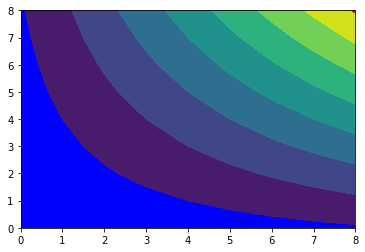

In [35]:

x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()  # tutaj niestety się nie udało połączyć tego z linear regression